In [32]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

Problem Statement:
Create a line plot showing the trend of job postings over the months for Cloud Engineer job postings:

Create a new DataFrame called df_ce that filters only job postings that are 'Cloud Engineer'
Customize the plot by setting the line style to dotted, the line color to purple, and the marker style to 'o'.
Add a title 'Job Postings Trend for Cloud Engineers' and label the y-axis as 'Count of Job Postings'.
Hint:
Use the DataFrames plot() method to create the line plot and customize the line style, color, and marker style using the linestyle, color, and marker parameters.

In [33]:
df_ce = df[df['job_title_short'] == 'Cloud Engineer'].copy()
df_ce['job_posted_date'] = df_ce['job_posted_date'].dt.to_period('M')
df_ce

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
48,Cloud Engineer,Lead Qa Engineer,"Ciudad Nezahualcóyotl, State of Mexico, Mexico",via BeBee,Full-time,False,Mexico,2023-11,False,False,Mexico,None,NaN,NaN,Zipdev,"[javascript, python, gcp, aws, selenium]","{'cloud': ['gcp', 'aws'], 'libraries': ['selen..."
288,Cloud Engineer,"Engineer – Data Center, Cloud",Abu Dhabi - United Arab Emirates,via BeBee,Full-time,False,United Arab Emirates,2023-09,False,False,United Arab Emirates,None,NaN,NaN,Etisalat,[node],{'webframeworks': ['node']}
295,Cloud Engineer,"Lead Engineer, Building","Saint-Étienne-du-Rouvray, France",via Emplois Trabajo.org,Full-time,False,France,2023-04,False,False,France,None,NaN,NaN,LHR Global,"[go, flow]","{'other': ['flow'], 'programming': ['go']}"
354,Cloud Engineer,Server Engineer,"Cape Town, South Africa",via LinkedIn,Full-time,False,South Africa,2023-09,False,False,South Africa,None,NaN,NaN,First Quantum Minerals,[azure],{'cloud': ['azure']}
355,Cloud Engineer,Environment Engineer,Bahrain,via BeBee,Full-time,False,Bahrain,2023-07,False,False,Bahrain,None,NaN,NaN,Al Hassanain,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785629,Cloud Engineer,Employee Service Analyst,"Manizales, Caldas, Colombia","via Trabajo.org - Vacantes De Empleo, Trabajo",Full-time,False,Colombia,2023-09,False,False,Colombia,None,NaN,NaN,UNITED PARCEL SERVICE,"[word, excel, outlook]","{'analyst_tools': ['word', 'excel', 'outlook']}"
785664,Cloud Engineer,Performance Engineer,"Colombia, Huila, Colombia","via Trabajo.org - Vacantes De Empleo, Trabajo",Full-time,False,Colombia,2023-10,True,False,Colombia,None,NaN,NaN,"Perficient, Inc","[groovy, python, bash, javascript, aws, gcp, e...","{'analyst_tools': ['excel'], 'cloud': ['aws', ..."
785672,Cloud Engineer,"Customer Engineer, Apigee, Google Cloud","Buenos Aires, Argentina","via Trabajo.org - Vacantes De Empleo, Trabajo",Full-time,False,Argentina,2023-08,False,False,Argentina,None,NaN,NaN,Emprego,None,None
785677,Cloud Engineer,"Engineer 3, Facilities","Penang, Malaysia",via Smart Recruiters Jobs,Full-time,False,Malaysia,2023-12,False,False,Malaysia,None,NaN,NaN,Western Digital,None,None


In [34]:
df_ce_grouped = df_ce.groupby('job_posted_date')['job_title_short'].count().reset_index()
df_ce_grouped

,job_posted_date,job_title_short
0,2023-01,1295
1,2023-02,843
2,2023-03,883
3,2023-04,1051
4,2023-05,480
5,2023-06,714
6,2023-07,1059
7,2023-08,1378
8,2023-09,1022
9,2023-10,1186


In [35]:
df_ce_grouped['job_posted_date'] = df_ce_grouped['job_posted_date'].dt.strftime('%b')
df_ce_grouped

,job_posted_date,job_title_short
0,Jan,1295
1,Feb,843
2,Mar,883
3,Apr,1051
4,May,480
5,Jun,714
6,Jul,1059
7,Aug,1378
8,Sep,1022
9,Oct,1186


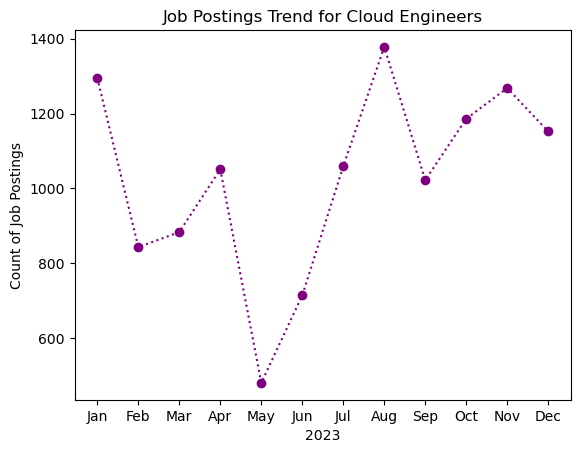

In [36]:
plt.plot(df_ce_grouped.job_posted_date, df_ce_grouped.job_title_short, color='purple', marker='o', linestyle=':')
plt.title('Job Postings Trend for Cloud Engineers')
plt.xlabel('2023')
plt.ylabel('Count of Job Postings')
plt.show()

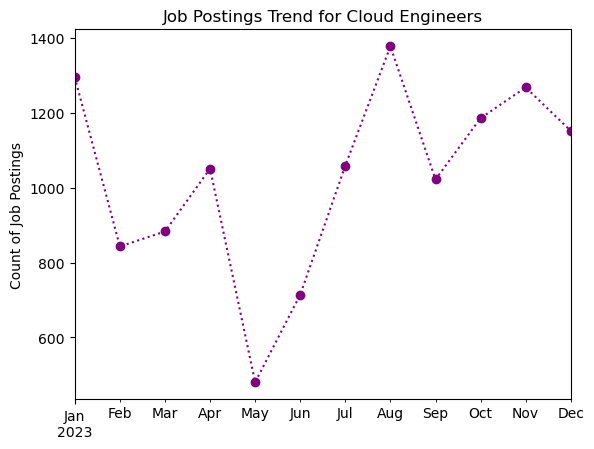

In [37]:
df_ce = df[df['job_title_short'] == 'Cloud Engineer'].copy()
df_ce['job_posted_month'] = df_ce['job_posted_date'].dt.to_period('M')
monthly_job_postings = df_ce.groupby('job_posted_month').size()
monthly_job_postings.plot( kind='line',  linestyle=':',  color='purple',  marker='o' )
plt.title('Job Postings Trend for Cloud Engineers')
plt.ylabel('Count of Job Postings')
plt.xlabel('')
plt.show()

In [38]:
monthly_job_postings

job_posted_month
2023-01    1295
2023-02     843
2023-03     883
2023-04    1051
2023-05     480
2023-06     714
2023-07    1059
2023-08    1378
2023-09    1022
2023-10    1186
2023-11    1268
2023-12    1152
Freq: M, dtype: int64

Problem Statement:
Create a bar chart showing the top 5 job companies hiring for Senior Data Analyst roles:

Create a DataFrame called SDA_df. 
Customize the plot by setting the bar colors to 5 different colors with the variable colors.
Add a grid to the y-axis only and making it dashes.
Rotate the x-axis labels by 45 degrees.
Label the y-axis as 'Number of Job Postings' and set the title to 'Top 5 Companies hiring Senior Data Analysts by Number of Postings'; Make the font size 14.

Hint:
Use DataFrame method plot() to create the bar chart specifying the color paramater. Customize the grid using the plt.grid() function specifying the parameters of axis of 'y' and linestyle of '--'.

In [39]:
colors = ['blue', 'orange', 'green', 'red', 'purple']

In [80]:
SDA_df = df[df['job_title_short'] == 'Senior Data Analyst'].copy()
SDA_df

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
25,Senior Data Analyst,"Senior Officer, Data Analyst, GTO",Singapore,via BeBee Singapore,Full-time,False,Singapore,2023-06-23 13:56:10,True,False,Singapore,None,NaN,NaN,United Overseas Bank,[sql],{'programming': ['sql']}
45,Senior Data Analyst,Senior Data Analyst,"Leeds, UK",via My Stateline Jobs,Full-time,False,United Kingdom,2023-05-30 13:14:08,True,False,United Kingdom,None,NaN,NaN,Corecom Consulting,"[sql, python]","{'programming': ['sql', 'python']}"
64,Senior Data Analyst,Senior Data Analyst,"Berlin, Germany",via BeBee,Full-time,False,Germany,2023-11-25 13:13:39,True,False,Germany,None,NaN,NaN,Stepstone GmbH,None,None
106,Senior Data Analyst,Senior Data Analyst (1541),Israel,via LinkedIn,Full-time,False,Israel,2023-07-13 13:27:00,True,False,Israel,None,NaN,NaN,TCM Technologies LTD,[python],{'programming': ['python']}
150,Senior Data Analyst,Senior Consultant Data & Analytics,Belgium,via LinkedIn,Full-time,False,Belgium,2023-12-09 13:44:56,False,False,Belgium,None,NaN,NaN,EY,[excel],{'analyst_tools': ['excel']}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785417,Senior Data Analyst,Senior Statistical Data Analyst,"Bogotá, Bogota, Colombia","via Trabajo.org - Vacantes De Empleo, Trabajo",Full-time,False,Colombia,2023-09-27 06:23:40,True,False,Colombia,None,NaN,NaN,Inchcape Digital,"[python, r]","{'programming': ['python', 'r']}"
785542,Senior Data Analyst,Senior Data Analyst (Hybrid),"Owings Mills, MD",via LinkedIn,Full-time,False,"New York, United States",2023-01-26 06:00:25,False,False,United States,None,NaN,NaN,CareFirst BlueCross BlueShield,"[sql, excel, flow]","{'analyst_tools': ['excel'], 'other': ['flow']..."
785592,Senior Data Analyst,VP - Institutional Credit Management - Lending...,"Warsaw, Poland",via Trabajo.org,Full-time,False,Poland,2023-01-13 06:41:53,True,False,Poland,None,NaN,NaN,Citi,None,None
785625,Senior Data Analyst,Senior Data Analyst,"Fort Lauderdale, FL",via Trabajo.org,Full-time,False,"Florida, United States",2023-01-21 06:20:14,False,True,United States,None,NaN,NaN,The Farmer's Dog,"[excel, sheets]","{'analyst_tools': ['excel', 'sheets']}"


In [81]:
top_5 = SDA_df.groupby('company_name')['job_title_short'].count().rename('job_counts')
top_5_final = top_5.sort_values(ascending=False).reset_index().head()
top_5_final

,company_name,job_counts
0,UnitedHealth Group,390
1,Citi,356
2,Emprego,235
3,Wells Fargo,219
4,Walmart,141


Customize the plot by setting the bar colors to 5 different colors with the variable colors.
Add a grid to the y-axis only and making it dashes.
Rotate the x-axis labels by 45 degrees.
Label the y-axis as 'Number of Job Postings' and set the title to 'Top 5 Companies hiring Senior Data Analysts by Number of Postings'; Make the font size 14.

Hint:
Use DataFrame method plot() to create the bar chart specifying the color paramater. Customize the grid using the plt.grid() function specifying the parameters of axis of 'y' and linestyle of '--'.

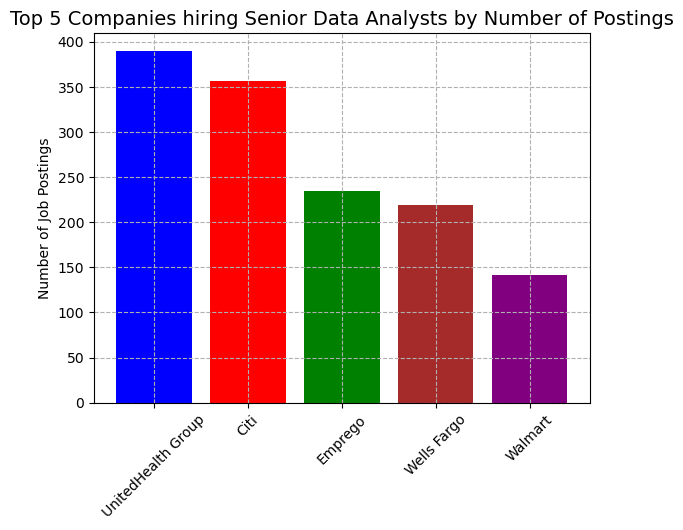

In [ ]:
colors = ['blue', 'red', 'green', 'brown', 'purple']
plt.bar(top_5_final.company_name, top_5_final.job_counts, color=colors)
plt.grid('y', linestyle='--')
plt.title('Top 5 Companies hiring Senior Data Analysts by Number of Postings', fontsize=14)
plt.xlabel('')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=45)
plt.show()

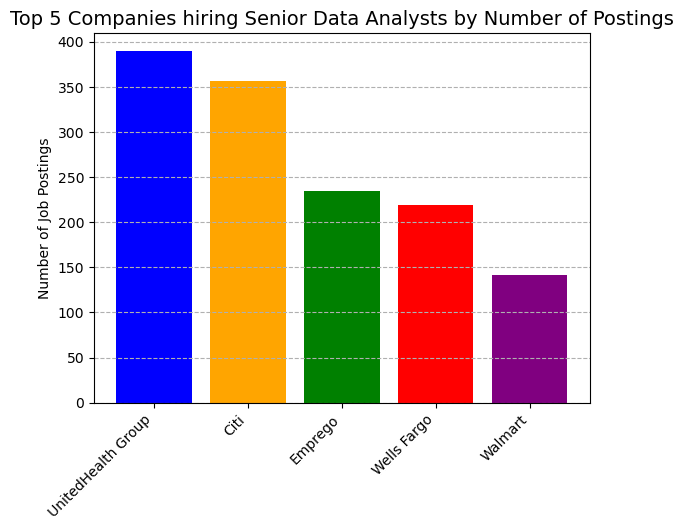

In [82]:
# Filter for Senior Data Analyst roles
SDA_df = df[df['job_title_short'] == 'Senior Data Analyst'].copy()

# Get the top 5 companies by number of postings
location_counts = SDA_df['company_name'].value_counts().head(5)

# Custom colors
colors = ['blue', 'orange', 'green', 'red', 'purple']

# Plot the bar chart
plt.bar(location_counts.index, location_counts.values, color=colors)
plt.xlabel('')
plt.ylabel('Number of Job Postings')
plt.title('Top 5 Companies hiring Senior Data Analysts by Number of Postings', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.show()

In [87]:
location_counts

company_name
UnitedHealth Group    390
Citi                  356
Emprego               235
Wells Fargo           219
Walmart               141
Name: count, dtype: int64